<h1 style="font-family: times, serif; font-style:italic">Customer Segmentation</h1>
<i>by</i> <b>Ntigkaris E. Alexandros</b>

<center><br><img src="./img.png"/></center>

<p align="justify">In this notebook we will analyze and cluster customer data taken from an anonymous private enterprise. Data consist of $2,000$ records with respect to the customer ID, Sex, Marital Status, Age, Education, Income, Occupation and Residence Size. First we conduct an exploratory analysis, getting information about and from the distribution of the data. We also observe and visualize certain data behaviors and correlations between them. We engineer a new feature from those given by the raw data, in order to delve deeper on how much value we can obtain from our findings, that later on will prove helpful to the data scientist and his/her company. Finally, we construct our model. The purpose of the model is group data with similar traits and behaviors into clusters. We then evaluate the model and visualize it for a better understanding of its results.</p>

<i>versions: [python 3.9.2/numpy 1.19.5/pandas 1.2.3/matplotlib 3.3.4/seaborn 0.11.1/plotly 5.6.0]</i>

<section><b>1. Imports</b></section>

We use:

- <b>numpy</b> for array and vector operations

- <b>pandas</b> for manipulating our data in dataframe form

- <b>pyplot</b>, <b>plotly</b> and <b>seaborn</b> for data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
sns.set_theme(style="ticks")
import plotly.graph_objects as go
from warnings import simplefilter
simplefilter("ignore")

<section><b>2. Exploratory Analysis</b></section>

First we will read and display our raw data. Data are seperated into $8$ features:

- <b>ID</b>: unique identifier for each customer

- <b>Sex</b>: $0$ for Male, $1$ for Female

- <b>Marital Status</b>: $0$ for Single, $1$ for Married

- <b>Age</b>

- <b>Education</b>: $0$ for High School, $1$ for Bachelor, $2$ for Master, $3$ for Master and beyond (e.g. PhD)

- <b>Income</b>: Annual assumed income in dollars

- <b>Occupation</b>: $0$ for jobless, $1$ for employee, $2$ for enterpreneur

- <b>Residence size</b>: listed $0$,$1$ or $2$ depeding on the square-meters

In [2]:
df = pd.read_csv("./data.csv")
df[:5]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Residence size
0,100001975,1,0,34,1,120863,1,0
1,100001167,0,0,36,1,149040,2,2
2,100001945,1,1,21,1,68790,0,0
3,100001581,1,1,27,1,115026,1,0
4,100001153,0,0,47,1,112227,2,1


We can get a raw representation of the values' distribution of the features by using the <b>values_counts</b> method.

In [3]:
df.Education.value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

In [4]:
df.shape

(2000, 8)

<b>describe</b> method will give us an estimate for the values contained in each feature. For example the minimum and maximum age in our sample is $18$ and $76$ respectively. Also the $\frac{1}{4}^{th}$, $\frac{3}{4}^{th}$ quantiles and expected value are listed.

In [5]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Residence size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<b>info</b> give us feedback about the structure of data. We can see that all numerical values are correctly read by the computer as 64-bit integers, while out of the $2,000$ data recordings, no data is missing.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              2000 non-null   int64
 1   Sex             2000 non-null   int64
 2   Marital status  2000 non-null   int64
 3   Age             2000 non-null   int64
 4   Education       2000 non-null   int64
 5   Income          2000 non-null   int64
 6   Occupation      2000 non-null   int64
 7   Residence size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df.ID.is_unique

True

We will drop <b>ID</b> column since it is unique for each costumer, thus it is redundant for our analysis.

In [8]:
df.drop(columns = ["ID"], inplace=True)

We will rename the following columns for efficiency.

In [9]:
df.rename(columns={"Marital status":"Marital_Status","Residence size":"Residence_Size"},inplace=True)

In [10]:
df.columns.values

array(['Sex', 'Marital_Status', 'Age', 'Education', 'Income',
       'Occupation', 'Residence_Size'], dtype=object)

Here I introduce a new feature to the dataframe called <b>Status</b>. Status will essentially label each costumer according to his/her income and marital status. I chose those two features because how much money somebody makes and what everyday his/her needs are (house equipment, rent, infants, cohosting etc.), are crucial factors to his/her consumer behavior. <b>Status</b> therefore classifies costumer behaviors into $4$ groups:

- <b>Jeune</b>, for usually young single costumers with relatively low income

- <b>Low Class</b>, for families with low income

- <b>Bachelor</b>, for single costumers with average sufficient income

- <b>Middle Class</b>, for families with a stable average income

- <b>Affluent</b>, for costumers with large income gains

In [11]:
df["Status"] = np.copy(df.Income)
df.Status[(df.Income <= 80e3)&(df.Marital_Status == 0)] = "Jeune"
df.Status[(df.Income <= 80e3)&(df.Marital_Status == 1)] = "Low Class"
df.Status[(df.Income>80e3)&(df.Income<=150e3)&(df.Marital_Status == 0)] = "Bachelor"
df.Status[(df.Income>80e3)&(df.Income<=150e3)&(df.Marital_Status == 1)] = "Middle Class"
df.Status[(df.Income > 150e3)] = "Affluent"
df[:5]

,Sex,Marital_Status,Age,Education,Income,Occupation,Residence_Size,Status
0,1,0,34,1,120863,1,0,Bachelor
1,0,0,36,1,149040,2,2,Bachelor
2,1,1,21,1,68790,0,0,Low Class
3,1,1,27,1,115026,1,0,Middle Class
4,0,0,47,1,112227,2,1,Bachelor


After that, we plot the histograms of our features. Distributions always give us interesting info and well-rounded data are preferred to work with.

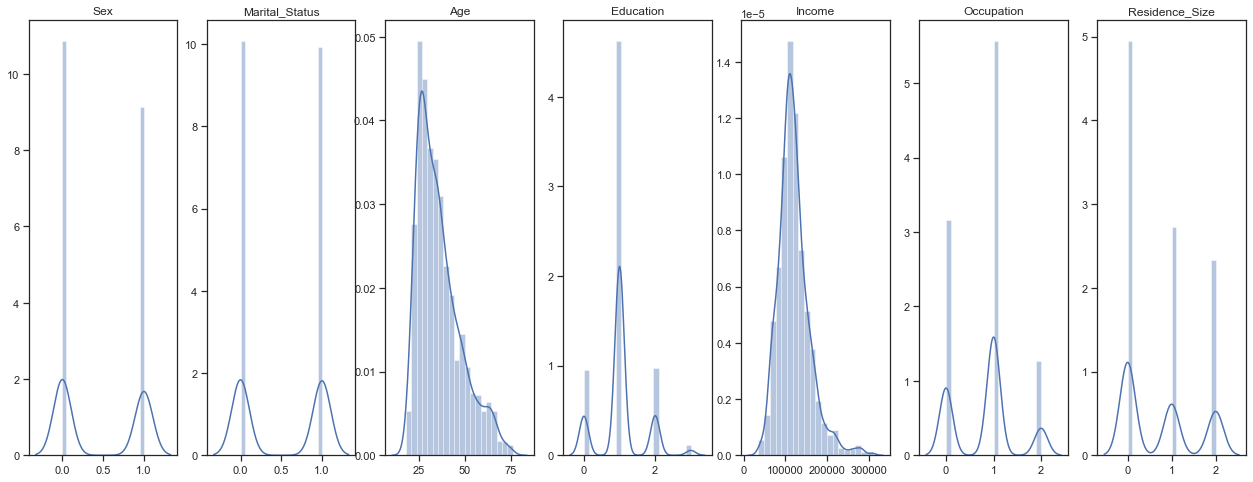

In [12]:
plt.figure(figsize=(25,8))
for i,col in enumerate(df.drop(columns=["Status"]).columns.values):
    plt.subplot(1,8,i+1)
    plt.title(col)
    sns.distplot(df[col],bins=20)
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

The majority of the features contains categorical values, so histograms are not telling a lot. However both <b>Age</b> and <b>Income</b> have continuous values but their distributions seem a bit deviant from Gaussian perspective, so we will apply $log_{10}$ transformation to fix that.

In [13]:
df.Age = np.log10(df.Age)
df.Income = np.log10(df.Income)

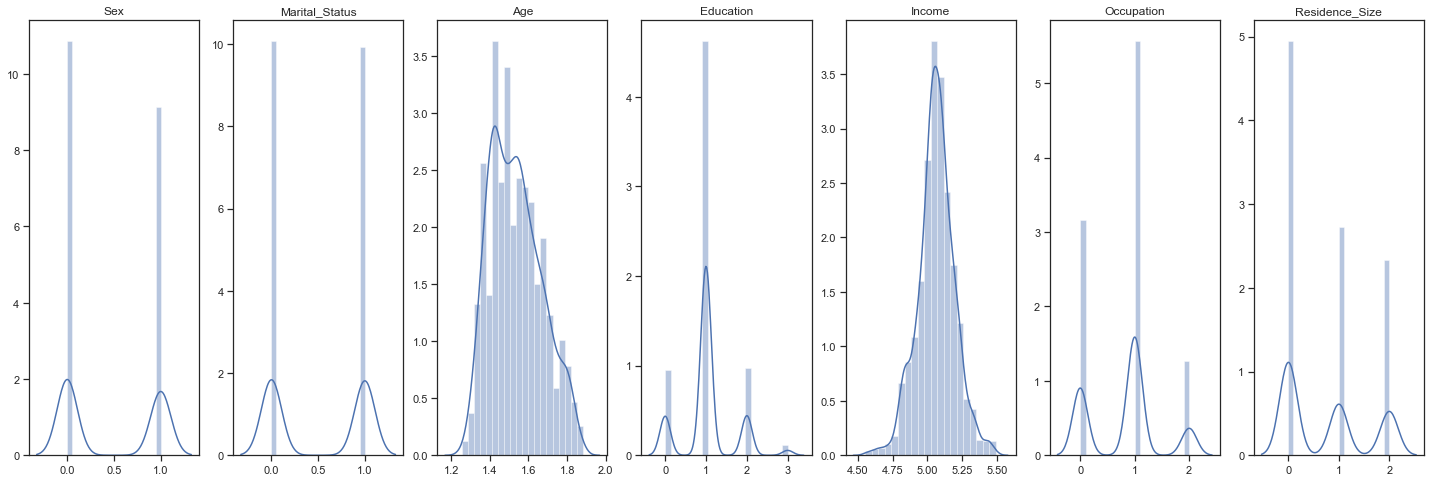

In [14]:
plt.figure(figsize=(25,8))
for i,col in enumerate(df.drop(columns=["Status"]).columns.values):
    plt.subplot(1,7,i+1)
    plt.title(col)
    sns.distplot(df[col],bins=20)
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

Distributions are fixed.

Next for our categorical features that we mentioned before, we will use count-plots to get a better view at the data.

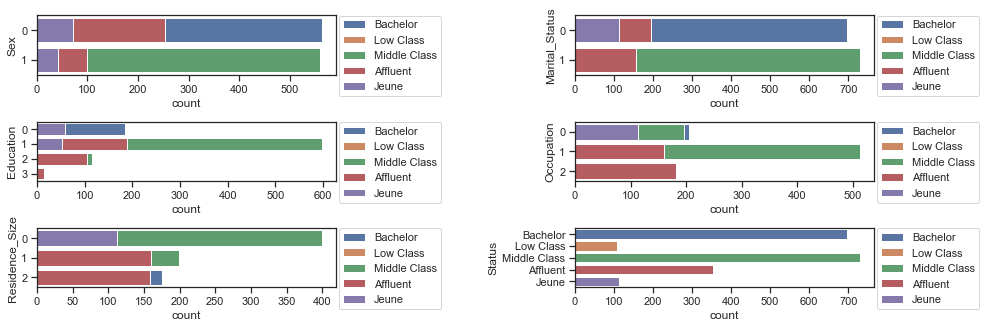

In [15]:
plt.figure(figsize = (15,5))
for i,col in enumerate(df.drop(columns=["Age","Income"]).columns.values):
    plt.subplot(3,2,i+1)
    sns.countplot(y=col , data=df,hue=df.Status,dodge=False)
    plt.legend(bbox_to_anchor=(1.01, 1.), loc=2, borderaxespad=0.)
    plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.show()

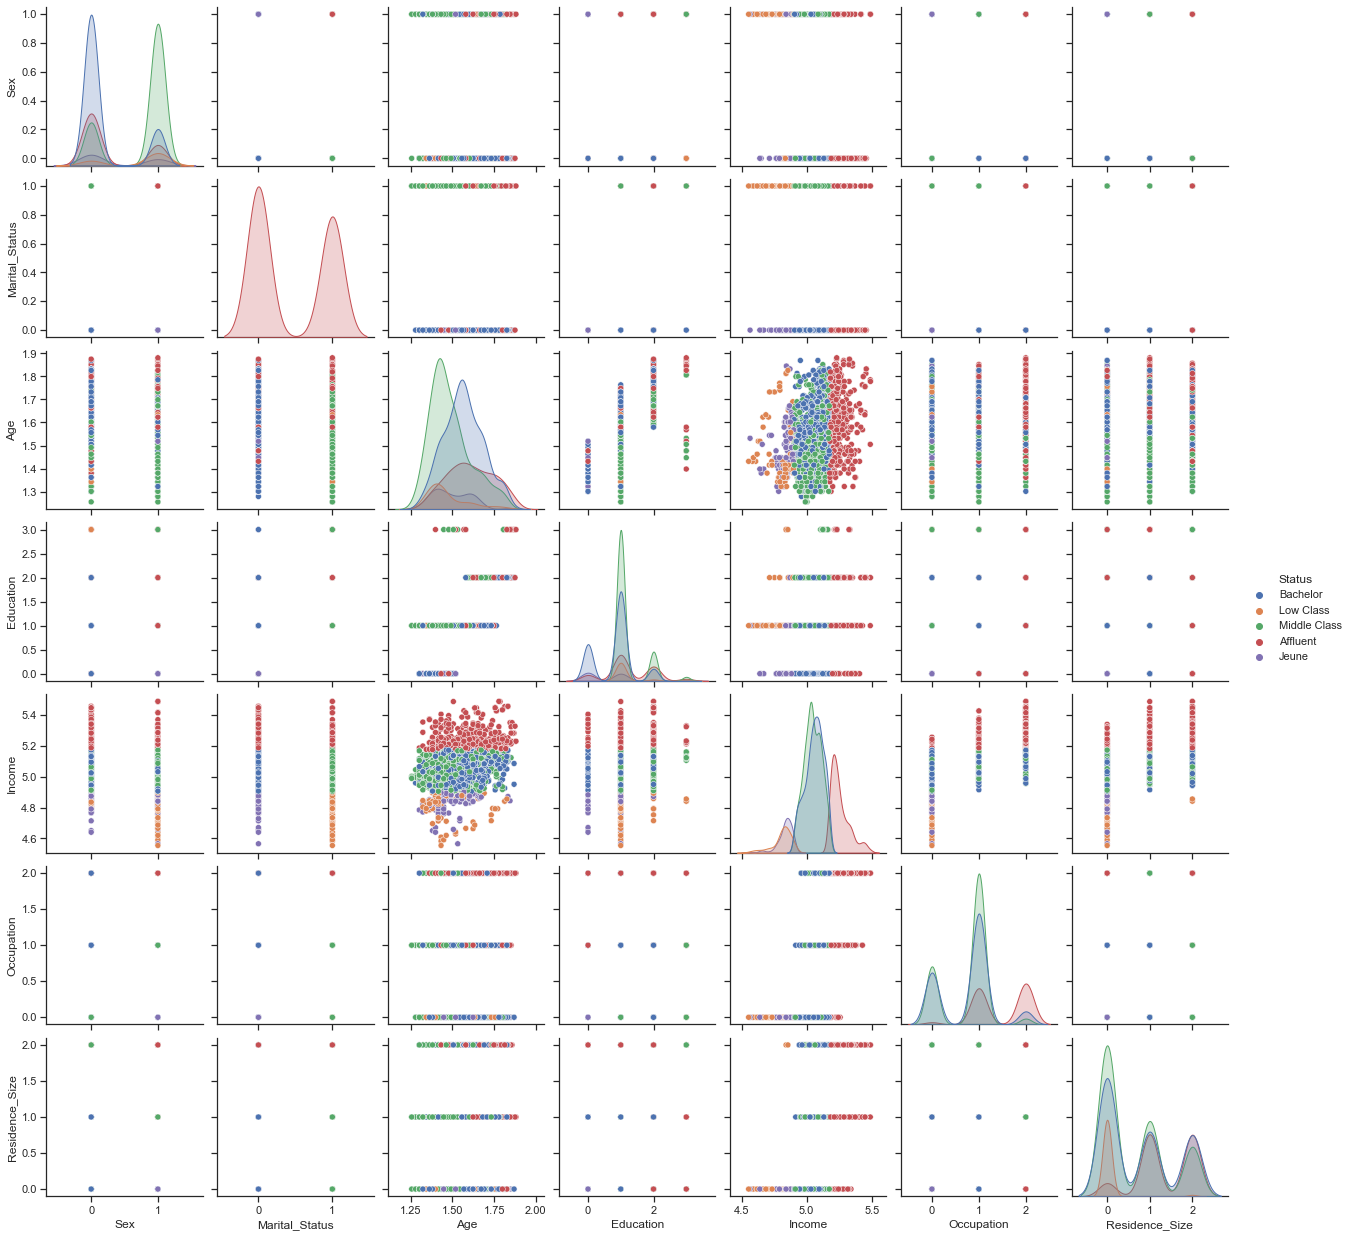

In [16]:
sns.pairplot(df,hue="Status")
plt.show()

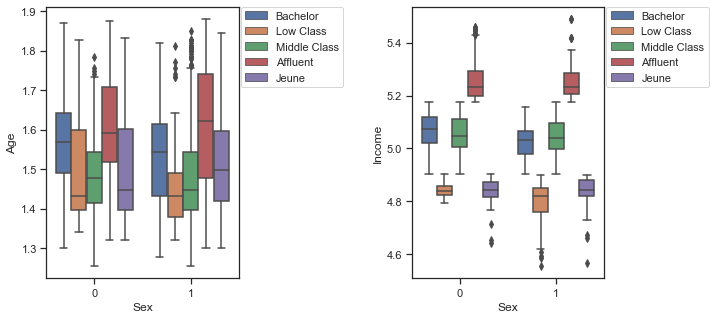

In [17]:
plt.figure(figsize=(10,5))
for i,col in enumerate(["Age","Income"]):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=df.Sex,y=df[col],hue=df.Status)
    plt.legend(bbox_to_anchor=(1.01, 1.), loc=2, borderaxespad=0.)
    plt.subplots_adjust(wspace=0.9)
plt.show()

Box-plots are another way to view data distributions from a different perspective. For example male costumers of <b>Bachelor</b> class and female costumers of the <b>Middle</b> and <b>Affluent</b> class are shown here to have more consistent and predictive readings.

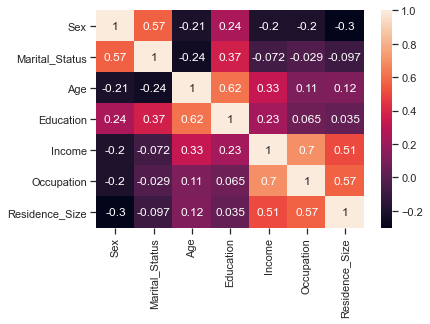

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Correlation matrix is extremely insightful! <b>Residence Size</b>, <b>Occupation</b> and <b>Age</b> are well correlated with <b>Income</b> and therefore with the <b>Status</b> feature. As such our model shall include those features since the majority of them work good together.

<section><b>3. Constructing our model</b></section>

In the previous section we were able to define what data are useful for our model building. Our goal is to have an algorithm group our data in different discrete clusters. The algorithm we are going to use is <b>K-Means</b>:

$$S_i ^{(t)} = \Big\{ x_p : \Big|\Big|x_p - m_i ^{(t)}\Big|\Big|^2 \leq \Big|\Big|x_p - m_j ^{(t)}\Big|\Big|^2 , 1 \leq j \leq k \Big\}$$

$$m_i ^{(t+1)} = \frac{1}{\Big|S_i ^{(t)}\Big|} \sum _{j} x_j$$

<b>K-Means</b> requires data to be scaled in order to be used as input to the algorithm function. We will use <b>StandardScaler</b> to restructure data with mean $0$ and variance $1$, a fairly common scaling method.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

We declare the features we are going to use in a new dataframe <b>dfnew</b> and we map our <b>Status</b> feature into categorical numerals, since our algorithm requires data to be in numerical format.

In [20]:
dfnew = df.drop(columns=["Sex","Marital_Status","Occupation","Education"]) ###
dfnew.Status[df.Status == "Jeune"] = 0
dfnew.Status[df.Status == "Low Class"] = 1
dfnew.Status[df.Status == "Bachelor"] = 2
dfnew.Status[df.Status == "Middle Class"] = 3
dfnew.Status[df.Status == "Affluent"] = 4
dfnew[:5]

,Age,Income,Residence_Size,Status
0,1.531479,5.082293,0,2
1,1.556303,5.173303,2,2
2,1.322219,4.837525,0,1
3,1.431364,5.060796,0,3
4,1.672098,5.050097,1,2


We scale the data for the reasons we mentioned above.

In [21]:
scaler = StandardScaler()
scaler.fit(dfnew)
scaled_data = scaler.transform(dfnew)
dfscaled = pd.DataFrame(scaled_data,columns=dfnew.columns.values)
dfscaled[:5]

,Age,Income,Residence_Size,Status
0,-0.020401,0.149984,-0.909730,-0.538645
1,0.166682,0.834433,1.552326,-0.538645
2,-1.597489,-1.690824,-0.909730,-1.516223
3,-0.774921,-0.011689,-0.909730,0.438932
4,1.039375,-0.092150,0.321298,-0.538645


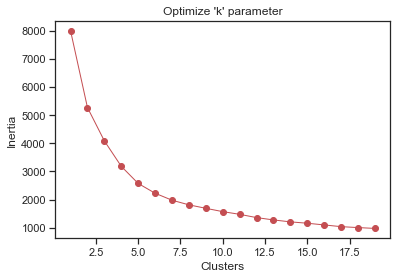

In [22]:
def optimal_clusters(data):

    inertia_arr , k_arr = [] , []

    for k in range(1,20):
        model = KMeans(n_clusters=k)
        model = model.fit(data)
        inertia_arr.append(model.inertia_)
        k_arr.append(k)

    plt.plot(k_arr,inertia_arr,"ro-",lw=1)
    plt.xlabel("Clusters")
    plt.ylabel("Inertia")
    plt.title("Optimize 'k' parameter")
    plt.show()
    return

optimal_clusters(scaled_data)

K-Means demands from us to input the number of clusters we want our data to group to. A common way to assume the optimal number of clusters, is to check how the model's inertia evolves as clusters increase. Generally low inertia usually implies good performance by the model. Here we see that until $N_{clusters} \simeq 6$ the inertia drop rate is relatively high, while after $N_{clusters} \simeq 7$ the drop rate slows down considerably.

In [23]:
def run_kmeans(dataframe,data,N):

    model = KMeans(n_clusters=N,random_state=0)
    model.fit(data)
    labels = model.labels_
    modeled_df = dataframe.assign(Cluster = labels)

    return modeled_df

In [24]:
def pointplot(scaled_dataframe,data,N_clusters,features):

    model_df = run_kmeans(scaled_dataframe,data,N_clusters)
    scaled_dataframe["Cluster"] = model_df["Cluster"]
    df_melt = pd.melt(scaled_dataframe.reset_index(), id_vars=["Cluster"], value_vars = features, var_name="Variable", value_name="Value")
    sns.pointplot(data=df_melt, x="Variable", y="Value", hue="Cluster",linestyles="-",markers="o",capsize=0.2,ci=None)
    plt.xlabel(None)
    plt.ylabel(None)
    return

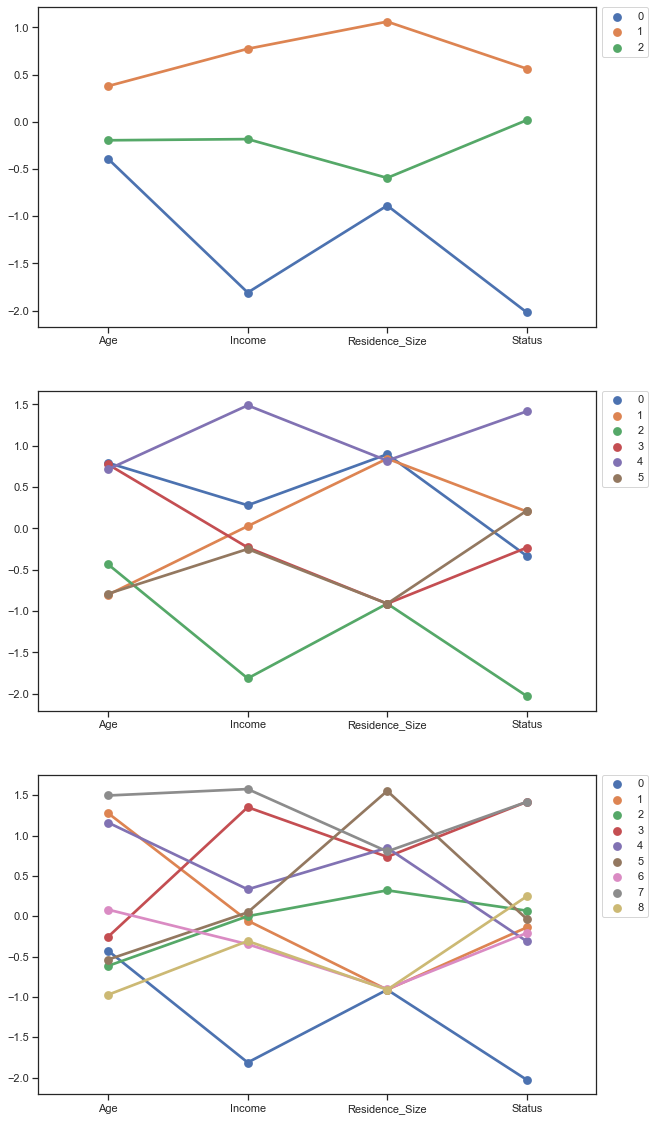

In [25]:
plt.figure(figsize=(10,20))
for i,clusters in enumerate([3,6,9]):
    plt.subplot(3,1,i+1)
    pointplot(dfscaled,scaled_data,clusters,dfnew.columns.values)
    plt.legend(bbox_to_anchor=(1.01, 1.), loc=2, borderaxespad=0.)
plt.show()

Point-plots inform us about the general tendency of a variable, in our case the model's $4$ features. Since our features were encoded into variables of $0$ mean and $1$ variance, we can observe at what value a feature tends to oscillate around. For example, using $3$ clusters, the first cluster determines an oscillation of <b>Age</b> around the maximum ($1$), whereas <b>Status</b> floats around the minimum ($0$).

<section><b>4. Evaluate & Visualize Model</b></section>

In order to evaluate our cluster model, a good metric is <b>Davies-Bouldin</b> score.

In [26]:
def eval_kmeans(data,N_clusters):

    model = KMeans(n_clusters=N_clusters,random_state=0)
    model = model.fit(data)
    score = davies_bouldin_score(data,model.labels_)
    return score

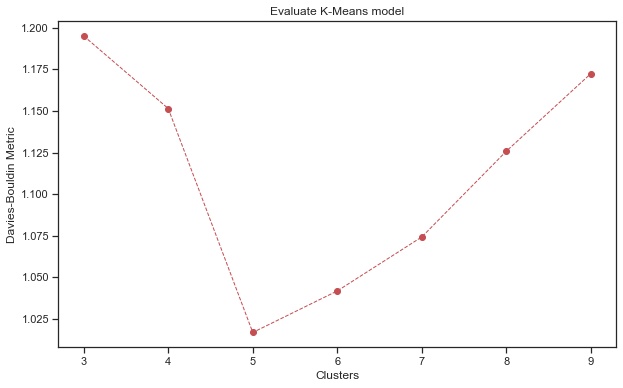

In [27]:
kmeans_score = []
clusters_arr = []

for i in range(3,10):
    kmeans_score.append(eval_kmeans(scaled_data,i))
    clusters_arr.append(i)

plt.figure(figsize=(10,6))
plt.plot(clusters_arr,kmeans_score,"ro--",lw=1)
plt.xlabel("Clusters")
plt.ylabel("Davies-Bouldin Metric")
plt.title("Evaluate K-Means model")
plt.show()

We conclude here that the optimal cluster size that yields the best model performance is $5$. Finally we display a 3D visualization of our model, by considering $3$ out of $4$ feature parameters. We can clearly see that data converge around $5$ clusters.

In [28]:
optimal_cluster_size = clusters_arr[np.argmin(kmeans_score)]
print(f"Optimal cluster size derived from evaluation: {optimal_cluster_size}")

final_model = KMeans(n_clusters=optimal_cluster_size,random_state=0)
final_model.fit(scaled_data)
dfscaled["Labels"] = final_model.labels_

visualize_data = go.Scatter3d(x=dfscaled.Status,y=dfscaled.Income,z=dfscaled.Age,mode="markers",marker=dict(color=dfscaled.Labels,size=16),opacity=0.5)
visualize_layout = go.Layout(title="Visualisation of customers' clustering",scene=dict(xaxis=dict(title="Status"),yaxis=dict(title="Income"),zaxis=dict(title="Age")))
kmeans3dplot = go.Figure(data=visualize_data,layout=visualize_layout)
kmeans3dplot.show()

Optimal cluster size derived from evaluation: 5


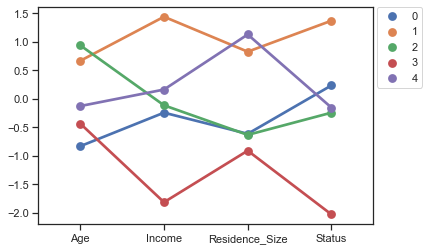

In [29]:
pointplot(dfscaled,scaled_data,optimal_cluster_size,dfnew.columns.values)
plt.legend(bbox_to_anchor=(1.01, 1.), loc=2, borderaxespad=0.)
plt.show()

In [30]:
dfscaled.describe()

,Age,Income,Residence_Size,Status,Cluster,Labels
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000
mean,-1.960210e-15,-2.105427e-15,-1.554312e-17,-1.527667e-16,1.828500,1.828500
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.515334,1.515334
min,-2.102035e+00,-3.821073e+00,-9.097295e-01,-2.493801e+00,0.000000,0.000000
25%,-7.749205e-01,-5.461412e-01,-9.097295e-01,-5.386454e-01,0.000000,0.000000
50%,-1.181121e-01,3.113738e-03,3.212982e-01,4.389324e-01,2.000000,2.000000
75%,6.712272e-01,5.847736e-01,3.212982e-01,4.389324e-01,3.000000,3.000000
max,2.612364e+00,3.219726e+00,1.552326e+00,1.416510e+00,4.000000,4.000000


<section><b>5. Results</b></section>

By viewing the data and clusters' distribution, we can interpret the results the algorithm chose to output us in the following manner:

- <b><u>Cluster 0</u></b> refers to young ($\leq 30$) individuals with a stable average income

- <b><u>Cluster 1</u></b> refers to relatively older ($\geq 40$) individuals with big affluence and a large residence

- <b><u>Cluster 2</u></b> refers to older individuals with a bit tighter but stable earnings

- <b><u>Cluster 3</u></b> refers to young and economically unstable individuals

- <b><u>Cluster 4</u></b> refers to young individuals with average earnings but with a big residence (probably parental affluence)

<center><br><img src="./sign.png"/></center>